<a href="https://colab.research.google.com/github/lecioassis/ia_unifesp_2023/blob/main/LECIO_ASSIS_TRABALHO_PR%C3%81TICO_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import zipfile
import numpy as np
import torch

## Leitura dos Dados

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
try:
  zf = zipfile.ZipFile('/content/drive/MyDrive/Data/House_Sale/House_Sale.zip')
  zf.extractall()
  df = pd.read_csv('/content/kc_house_data.csv')
  data = pd.read_csv('/content/kc_house_data.csv')
except:
  zf = zipfile.ZipFile('/content/drive/MyDrive/IA1s2023/Data/House_Sale/House_Sale.zip')
  zf.extractall()
  df = pd.read_csv('/content/kc_house_data.csv')
  data = pd.read_csv('/content/kc_house_data.csv')

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.shape

(21613, 21)

## Tratamento

In [6]:
data = data.drop(['id', 'date', 'lat', 'long','zipcode' ], axis=1) # remove a coluna de IDs
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,1800,7503


In [7]:
data.shape

(21613, 16)

In [8]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [9]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
np.where(data['sqft_above'].isnull().values==True)

(array([10, 17]),)

In [11]:
print(data.values[10])
print(data.values[17])

[6.625e+05 3.000e+00 2.500e+00 3.560e+03 9.796e+03 1.000e+00 0.000e+00
 0.000e+00 3.000e+00 8.000e+00       nan 1.700e+03 1.965e+03 0.000e+00
 2.210e+03 8.925e+03]
[4.850e+05 4.000e+00 1.000e+00 1.600e+03 4.300e+03 1.500e+00 0.000e+00
 0.000e+00 4.000e+00 7.000e+00       nan 0.000e+00 1.916e+03 0.000e+00
 1.610e+03 4.300e+03]


In [12]:
data = data.drop([10, 17])

In [13]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Correlação

In [14]:
#Tabela de correlação
corr = data.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308366,0.525150,0.702055,0.089661,0.256814,0.266371,0.397299,0.036379,0.667434,0.605567,0.323842,0.054006,0.126436,0.585377,0.082448
bedrooms,0.308366,1.000000,0.515974,0.576763,0.031710,0.175418,-0.006581,0.079537,0.028433,0.356998,0.477616,0.303251,0.154248,0.018844,0.391670,0.029252
bathrooms,0.525150,0.515974,1.000000,0.754684,0.087730,0.500712,0.063743,0.187735,-0.124917,0.664981,0.685363,0.283737,0.505968,0.050733,0.568626,0.087163
sqft_living,0.702055,0.576763,0.754684,1.000000,0.172841,0.354048,0.103829,0.284647,-0.058689,0.762727,0.876644,0.434925,0.318066,0.055377,0.756440,0.183301
sqft_lot,0.089661,0.031710,0.087730,0.172841,1.000000,-0.005206,0.021602,0.074705,-0.008951,0.113617,0.183511,0.015301,0.053061,0.007640,0.144605,0.718556
floors,0.256814,0.175418,0.500712,0.354048,-0.005206,1.000000,0.023695,0.029432,-0.263808,0.458208,0.523899,-0.245634,0.489361,0.006330,0.279907,-0.011275
waterfront,0.266371,-0.006581,0.063743,0.103829,0.021602,0.023695,1.000000,0.401857,0.016655,0.082775,0.072074,0.080618,-0.026172,0.092883,0.086463,0.030702
view,0.397299,0.079537,0.187735,0.284647,0.074705,0.029432,0.401857,1.000000,0.045995,0.251320,0.167648,0.277051,-0.053474,0.103912,0.280440,0.072569
condition,0.036379,0.028433,-0.124917,-0.058689,-0.008951,-0.263808,0.016655,0.045995,1.000000,-0.144647,-0.158206,0.174273,-0.361384,-0.060617,-0.092795,-0.003397
grade,0.667434,0.356998,0.664981,0.762727,0.113617,0.458208,0.082775,0.251320,-0.144647,1.000000,0.755924,0.168375,0.446958,0.014412,0.713197,0.119243


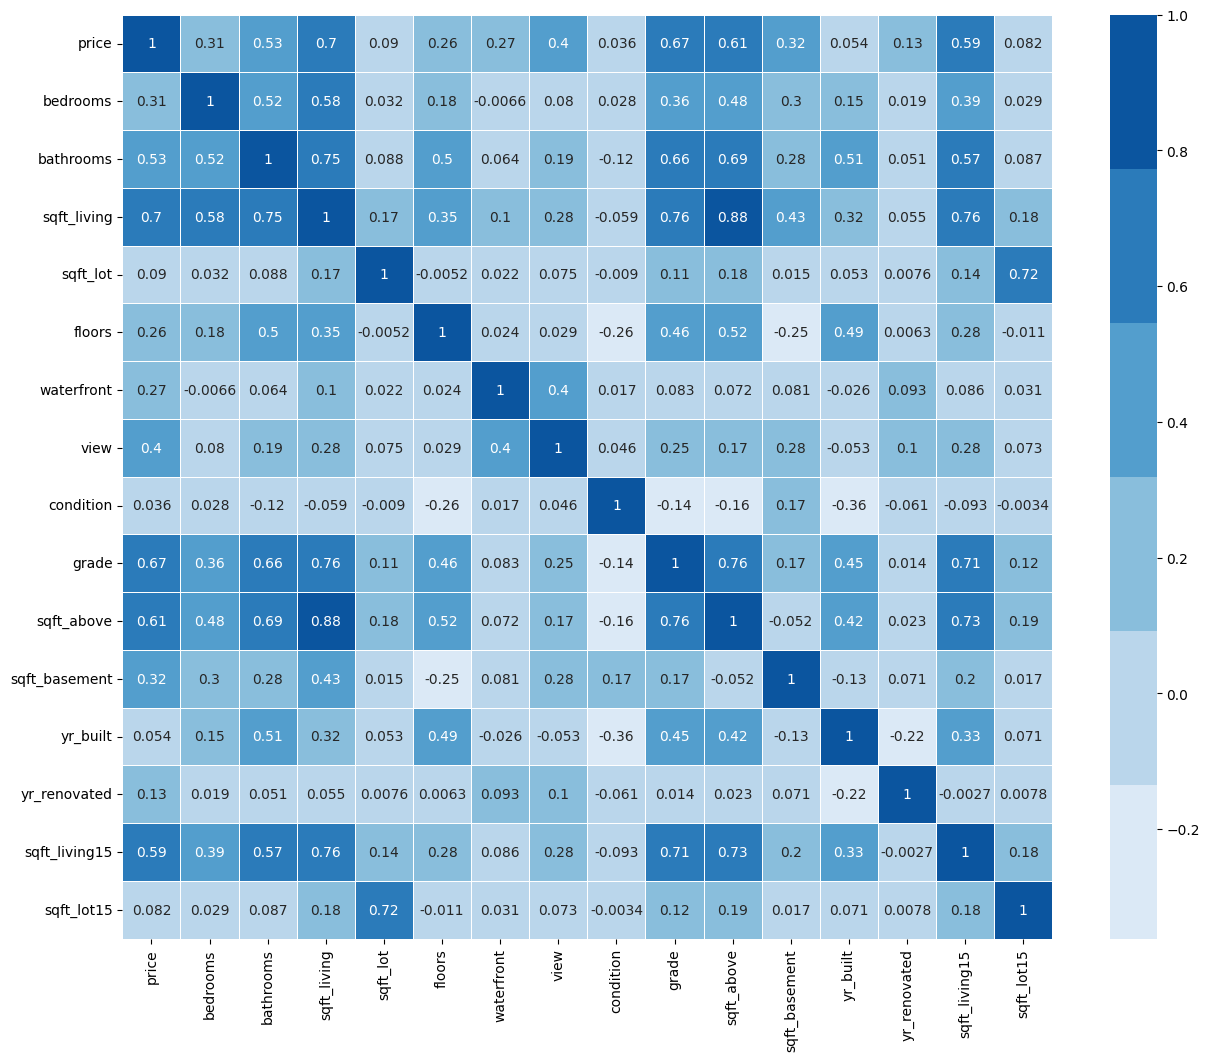

In [15]:
# Melhor visualização  da correlação
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, cmap=sns.color_palette("Blues"), linewidths=.5, annot=True);

In [16]:
data.sample(frac=1) # embaralha o dataframe

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
16453,525300.0,4,1.75,2520,7770,1.0,0,0,3,8,1680.0,840,1965,0,2340,7770
2480,432500.0,3,2.00,1720,8145,2.0,0,0,5,7,1720.0,0,1949,0,1400,8138
7970,690000.0,5,3.25,3370,7313,2.0,0,0,4,8,2140.0,1230,1988,0,2990,7806
2540,350000.0,3,2.00,1320,1298,3.0,0,0,3,7,1320.0,0,1995,0,1380,1503
4668,414000.0,2,1.00,800,5000,1.0,0,0,3,6,800.0,0,1938,0,1220,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13109,525000.0,4,1.50,1580,6360,1.5,0,0,3,7,1290.0,290,1945,0,1690,6360
3544,197000.0,4,1.00,1360,11175,1.0,0,0,3,7,1360.0,0,1961,0,1340,9702
18911,920000.0,3,3.25,3660,66211,2.0,0,0,3,10,3660.0,0,2003,0,3660,107153
17251,490000.0,4,2.50,3630,8387,2.0,0,0,3,10,3630.0,0,1997,0,3370,8869


In [17]:
from sklearn.model_selection import train_test_split # separa os dados em treinamento e teste de forma aleatória

y = data['price']
X = data.iloc[:, 1:17]
print(y.shape)
print(X.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.50, random_state=42)

(21611,)
(21611, 15)


## Árvore de Decisão

In [18]:
from sklearn import tree

clf = tree.DecisionTreeRegressor(random_state=0,max_depth=10)
clf = clf.fit(X_train, Y_train)

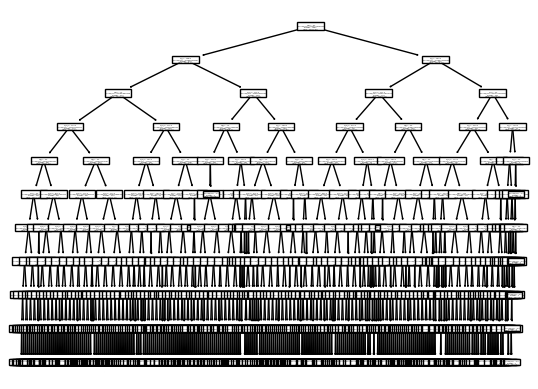

In [19]:
tree.plot_tree(clf)
plt.show()

In [20]:
# Classifica Teste
dt_predicao = clf.predict(X_test)

Decision Tree
MAE: 142293.8028449518
MSE: 62089350470.660995
RMSE: 249177.34742680963
Coefficient of determination: 0.58


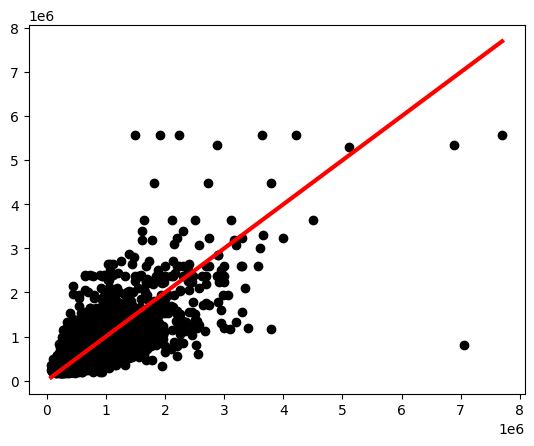

In [21]:
from sklearn import metrics

print("Decision Tree")
print('MAE:', metrics.mean_absolute_error(Y_test, dt_predicao))
print('MSE:', metrics.mean_squared_error(Y_test, dt_predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, dt_predicao)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(Y_test, dt_predicao))

# Plot outputs
plt.scatter(Y_test, dt_predicao, color="black")
plt.plot(np.arange(np.min(Y_test),np.max(Y_test)),
         np.arange(np.min(Y_test),np.max(Y_test)),color="red", linewidth=3)

plt.show()

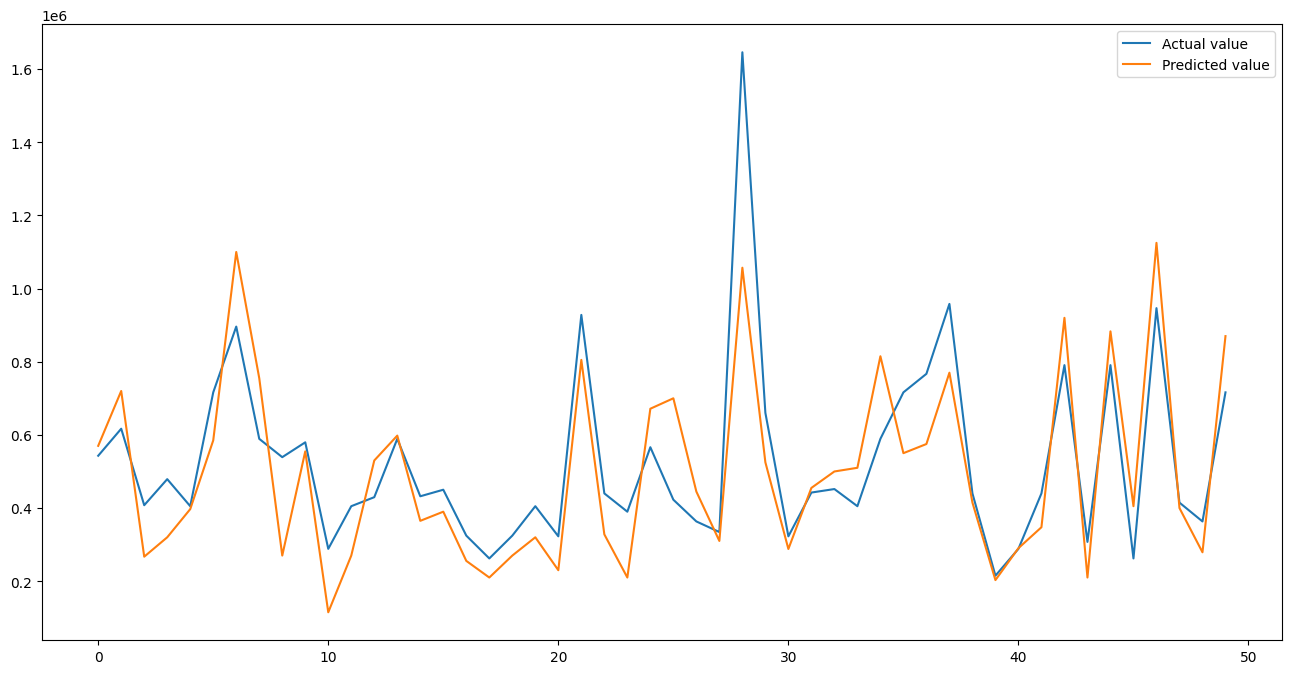

In [22]:
# criando um dataframe com y_test e dt_predicao
dt_outcomes = pd.DataFrame({'Predicted value':dt_predicao, 'Actual value':Y_test})
fig= plt.figure(figsize=(16,8))
dt_outcomes = dt_outcomes.reset_index()
dt_outcomes = dt_outcomes.drop(['index'],axis=1)
plt.plot(dt_outcomes[:50])
plt.legend(['Actual value','Predicted value'])


## Regressão Linear

Coefficients: 
 [-3.74572575e+04  4.41095282e+04  1.02049677e+02  3.62393608e-02
  2.72057788e+04  5.84397248e+05  4.54581960e+04  1.88812302e+04
  1.19853062e+05  4.75888440e+01  5.44608328e+01 -3.38554005e+03
 -6.95880180e-01  2.51177850e+01 -5.89398427e-01]
MAE: 140848.07275881304
MSE: 50802464832.38982
RMSE: 225394.02128803197
Coefficient of determination: 0.66


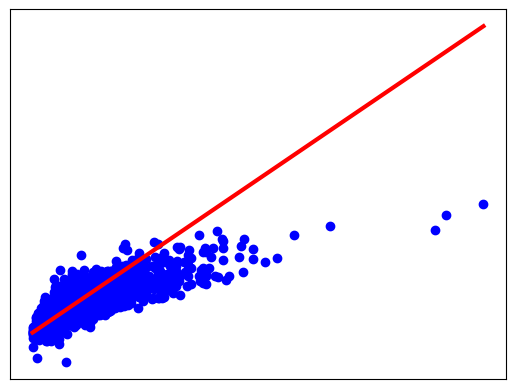

In [23]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
regr_predicao = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)

print('MAE:', metrics.mean_absolute_error(Y_test, regr_predicao))
print('MSE:', metrics.mean_squared_error(Y_test, regr_predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, regr_predicao)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(Y_test, regr_predicao))

# Plot outputs
plt.scatter(Y_test, regr_predicao, color="blue")
plt.plot(np.arange(np.min(Y_test),np.max(Y_test)),np.arange(np.min(Y_test),np.max(Y_test)),color="red", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

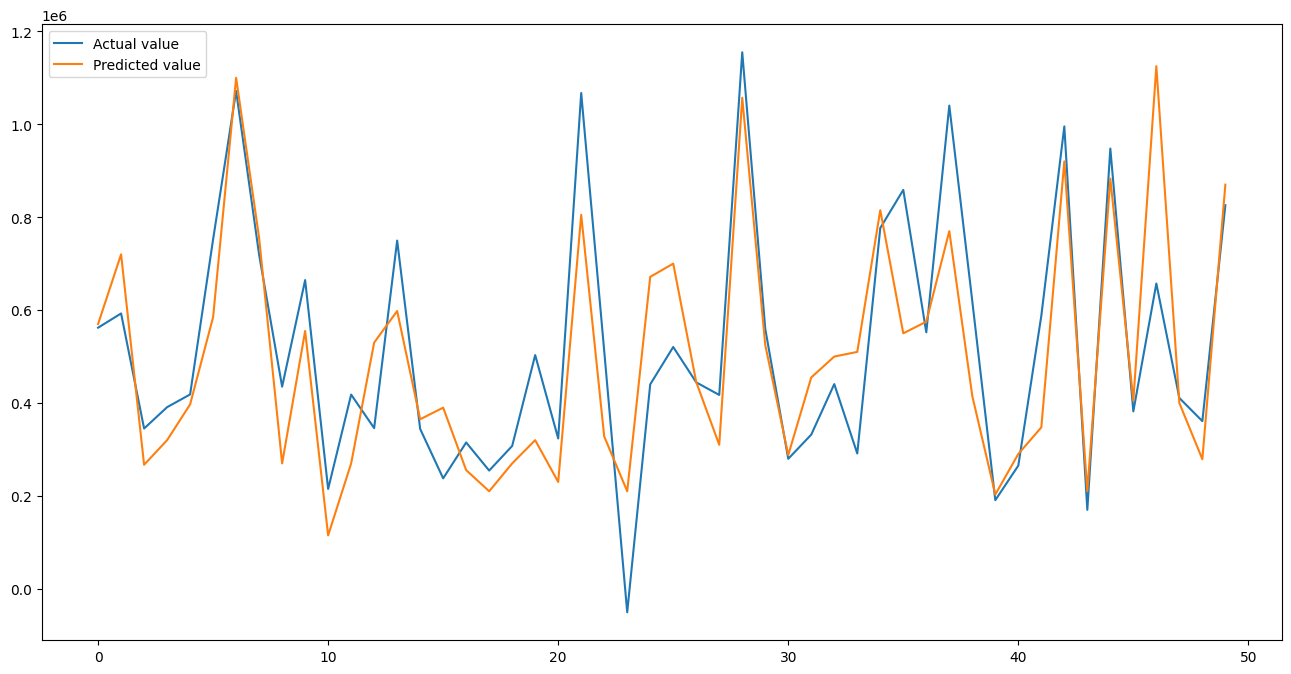

In [24]:
# criando um dataframe com y_test e regr_predicao
regr_outcomes = pd.DataFrame({'Predicted value':regr_predicao, 'Actual value':Y_test})
fig= plt.figure(figsize=(16,8))
regr_outcomes = regr_outcomes.reset_index()
regr_outcomes = regr_outcomes.drop(['index'],axis=1)
plt.plot(regr_outcomes[:50])
plt.legend(['Actual value','Predicted value'])

## Rede Neural Artificial

In [25]:
data = data.sample(frac=1)
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [26]:
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.feature_selection import SelectKBest, f_regression

In [27]:
x = data.iloc[:, 1:17].values
x

array([[3.000e+00, 3.250e+00, 1.370e+03, ..., 0.000e+00, 1.370e+03,
        1.236e+03],
       [2.000e+00, 1.000e+00, 8.800e+02, ..., 0.000e+00, 1.010e+03,
        6.160e+03],
       [4.000e+00, 3.500e+00, 3.560e+03, ..., 0.000e+00, 3.710e+03,
        6.562e+03],
       ...,
       [3.000e+00, 1.750e+00, 1.600e+03, ..., 0.000e+00, 1.750e+03,
        9.829e+03],
       [4.000e+00, 2.000e+00, 1.560e+03, ..., 0.000e+00, 1.560e+03,
        4.800e+03],
       [4.000e+00, 2.500e+00, 1.820e+03, ..., 0.000e+00, 1.820e+03,
        8.168e+03]])

In [28]:
y = data.iloc[:, 0].values.reshape(-1, 1)
y

array([[375000.],
       [208500.],
       [882990.],
       ...,
       [525000.],
       [459000.],
       [329500.]])

In [29]:
n_folds = 5
batch_size = 32
n_epochs = 1000
learning_rate = 1e-1

In [30]:
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(15, 100)
    self.dropout1 = nn.Dropout(p = 0.001)
    self.fc2 = nn.Linear(100, 1)


  def forward(self, x):
      x = nn.functional.leaky_relu(self.fc1(x))
      x = self.dropout1(x)
      x = self.fc2(x)

      return x

In [31]:
mlp = MLP()
loss_function = nn.MSELoss()
optimizer = optim.Adam(mlp.parameters(), lr=learning_rate)

models = []
results = []

kf = KFold(n_splits = n_folds)

best_model = None
weight_decay = 0.001
patience = 30.5
best_val_loss = float('inf')
val_losses = []
train_losses = []

for fold, (train_index, test_index) in enumerate(kf.split(x)):

  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  x_train = torch.FloatTensor(x_train)
  y_train = torch.FloatTensor(y_train)
  x_test = torch.FloatTensor(x_test)
  y_test = torch.FloatTensor(y_test)


  for epoch in range (n_epochs):
    y_pred = mlp(x_train)
    loss = loss_function(y_pred, y_train)

    l2_reg = torch.tensor(0.)
    for param in mlp.parameters():
      l2_reg += torch.norm(param)
    loss += weight_decay * l2_reg
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())
    with torch.no_grad():
      val_outputs = mlp(x_test)
      val_loss = loss_function(val_outputs, y_test)
      val_losses.append(val_loss.item())

    if val_loss < best_val_loss:
      best_val_loss = val_loss
      best_model = mlp.state_dict()
      counter = 0
    else:
      counter += 0.5
      if counter >= patience:
        mlp.load_state_dict(best_model)
        break
    
    y_pred = mlp(x_test)
    mape = mean_absolute_percentage_error(y_test, y_pred.detach().numpy())

  result = {
      'model' : mlp,
      'mape' : mape
  }

  results.append(result)

In [32]:
models_sorted = sorted(results, key=lambda x: x['mape'], reverse=False)

In [33]:
top_models = [r['model'] for r in models_sorted[:5]]

In [34]:
for i, model in enumerate(top_models):
    filename = f'Pedro_e_Lecio_RNAFOLD{i+1}.pth'
    torch.save(model.state_dict(), filename)
    print(f'Modelo {i+1}: {filename}, MAPE: {models_sorted[i]["mape"]}')

Modelo 1: Pedro_e_Lecio_RNAFOLD1.pth, MAPE: 0.2894383370876312
Modelo 2: Pedro_e_Lecio_RNAFOLD2.pth, MAPE: 0.2894383370876312
Modelo 3: Pedro_e_Lecio_RNAFOLD3.pth, MAPE: 0.2894383370876312
Modelo 4: Pedro_e_Lecio_RNAFOLD4.pth, MAPE: 0.29520803689956665
Modelo 5: Pedro_e_Lecio_RNAFOLD5.pth, MAPE: 0.29520803689956665


## Aplicação dos Modelos


* Calcular a diff = abs( y - h(x) ) e plotar igual aula prática II;
* Plotar o gráfico de linhas para todas as amostras, mostrando o comportamento de h(x) e f(x);
* Adicionar uma nova coluna na planilha dos dados com o nome de NEW PRICE com os valores estimados pela melhor h(x) encontrada.



In [35]:
df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
         'waterfront', 'view', 'condition', 'grade', 'sqft_above', 
         'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 
         'sqft_lot15', 'id', 'date', 'lat', 'long', 'zipcode']]

df = df.dropna()

df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'id', 'date', 'lat', 'long', 'zipcode'],
      dtype='object')

In [36]:
parameters = df.iloc[:, 1:16].values
tensor_parameters = torch.FloatTensor(parameters)
predicao = top_models[0](tensor_parameters).detach().numpy()
df['new_price'] = predicao

<ipython-input-36-7148c33f00e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_price'] = predicao


In [37]:
# dt
df['dt_new_price'] = clf.predict(tensor_parameters)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
<ipython-input-37-947023b54a25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dt_new_price'] = clf.predict(tensor_parameters)


In [38]:
# regr
df['regr_new_price'] = regr.predict(tensor_parameters)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-38-8cab0d814296>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['regr_new_price'] = regr.predict(tensor_parameters)


In [39]:
df['diff'] = abs(df['price'] - df['new_price'])
df['norm_diff'] = (df['diff'] - min(df['diff']))/(max(df['diff'])-min(df['diff']))

<ipython-input-39-98b5526aa08d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'] = abs(df['price'] - df['new_price'])
<ipython-input-39-98b5526aa08d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_diff'] = (df['diff'] - min(df['diff']))/(max(df['diff'])-min(df['diff']))


In [40]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,id,date,lat,long,zipcode,new_price,dt_new_price,regr_new_price,diff,norm_diff
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,7129300520,20141013T000000,47.5112,-122.257,98178,363277.00000,422774.166667,293594.965148,141377.00000,0.056151
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,6414100192,20141209T000000,47.7210,-122.319,98125,664556.37500,431636.155172,606517.261058,126556.37500,0.050265
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,5631500400,20150225T000000,47.7379,-122.233,98028,389084.31250,287876.153846,257727.803586,209084.31250,0.083043
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,2487200875,20141209T000000,47.5208,-122.393,98136,492024.34375,432153.229730,472097.289190,111975.65625,0.044474
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1954400510,20150218T000000,47.6168,-122.045,98074,377047.78125,407708.750000,434589.621770,132952.21875,0.052805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,263000018,20140521T000000,47.6993,-122.346,98103,487385.65625,493098.062500,410627.509127,127385.65625,0.050594
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,6600060120,20150223T000000,47.5107,-122.362,98146,465900.34375,439993.230548,450105.560777,65900.34375,0.026174
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,1523300141,20140623T000000,47.5944,-122.299,98144,322690.56250,316839.388571,134422.951345,79410.43750,0.031539
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,291310100,20150116T000000,47.5345,-122.069,98027,417638.18750,493098.062500,407986.392157,17638.18750,0.007005


## h(x) e f(x)

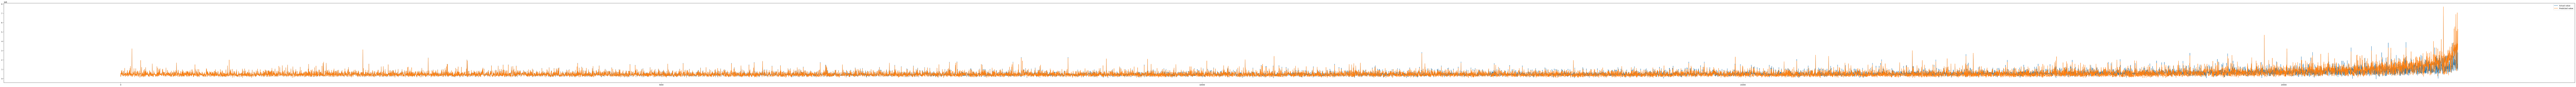

In [41]:
# criando um dataframe com y_test e dt_predicao
# (outcomes['diff'] - min(outcomes['diff']))/(max(outcomes['diff'])-min(outcomes['diff']))
outcomes = pd.DataFrame({'Predicted value':df['new_price'], 'Actual value':df['price']})
outcomes['diff'] = abs(outcomes['Predicted value'] - outcomes['Actual value'])
outcomes['norm_diff'] = (outcomes['diff'] - min(outcomes['diff']))/(max(outcomes['diff'])-min(outcomes['diff']))
outcomes = outcomes.sort_values(by=['norm_diff'])
outcomes = outcomes.drop(columns=['diff', 'norm_diff'])
fig = plt.figure(figsize=(256,8))
outcomes = outcomes.reset_index()
outcomes = outcomes.drop(['index'],axis=1)
plt.plot(outcomes)
plt.legend(['Actual value','Predicted value'])

## Diff

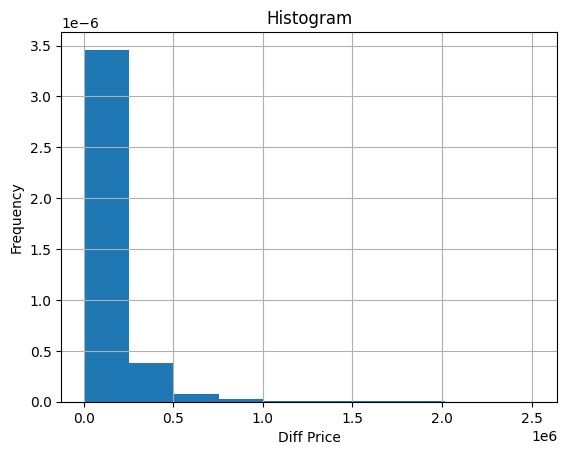

In [42]:
import numpy as np
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(df['diff'], density=True)
plt.xlabel('Diff Price')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.grid(True)
plt.show()

## Mapa

In [43]:
import folium
from folium.plugins import HeatMap

In [44]:
def plotMarker(dataset):
    
    popup = folium.Popup(html=f'''
<b>price:</b> {dataset['price']}<br>
<b>new_price(MLP):</b> {dataset['new_price']}<br>
<b>new_price(DT):</b> {dataset['dt_new_price']}<br>
<b>new_price(REGR):</b> {dataset['regr_new_price']}<br>
<b>diff:</b> {dataset['diff']}<br>
<b>bedrooms:</b> {dataset['bedrooms']}<br>
<b>bathrooms:</b> {dataset['bathrooms']}<br>
<b>sqft_living:</b> {dataset['sqft_living']}<br>
<b>sqft_living15:</b> {dataset['sqft_living15']}<br>
<b>sqft_lot:</b> {dataset['sqft_lot']}<br>
<b>sqft_lot15:</b> {dataset['sqft_lot15']}<br>
<b>floors:</b> {dataset['floors']}<br>
<b>waterfront:</b> {dataset['waterfront']}<br>
<b>view:</b> {dataset['view']}<br>
<b>condition:</b> {dataset['condition']}<br>
<b>grade:</b> {dataset['grade']}<br>
<b>sqft_above:</b> {dataset['sqft_above']}<br>
<b>sqft_basement:</b> {dataset['sqft_basement']}<br>
<b>yr_built:</b> {dataset['yr_built']}<br>
<b>yr_renovated:</b> {dataset['yr_renovated']}<br>
<b>zipcode:</b> {dataset['zipcode']}<br>
<b>lat:</b> {dataset['lat']}<br>
<b>long:</b> {dataset['long']}<br>

        ''',
        max_widht=400)
    
    folium.Marker(
        location=[dataset['lat'], dataset['long']],
        popup=popup,
        icon=folium.Icon(icon='home', icon_color='white')
        ).add_to(map)

In [45]:
def plotHeatMap(dataset):
    dataset['norm_diff'] = (dataset['norm_diff']-dataset['norm_diff'].min())/(dataset['norm_diff'].max()-dataset['norm_diff'].min())
    heat_df = dataset.loc[:,["lat","long","diff"]]
    heat_data = heat_df.values.tolist()
    HeatMap(heat_data).add_to(map)

In [46]:
location = df[['lat', 'long']].mean()
df_map = df.sample(n=1000)
map = folium.Map(location = location, zoom_start = 10)
plotHeatMap(df_map)
df_map.apply(plotMarker, axis=1)
map.save('map_test.html')

## Comparação da predição de diferentes modelos

In [47]:
df['new_price'].shape

(21611,)

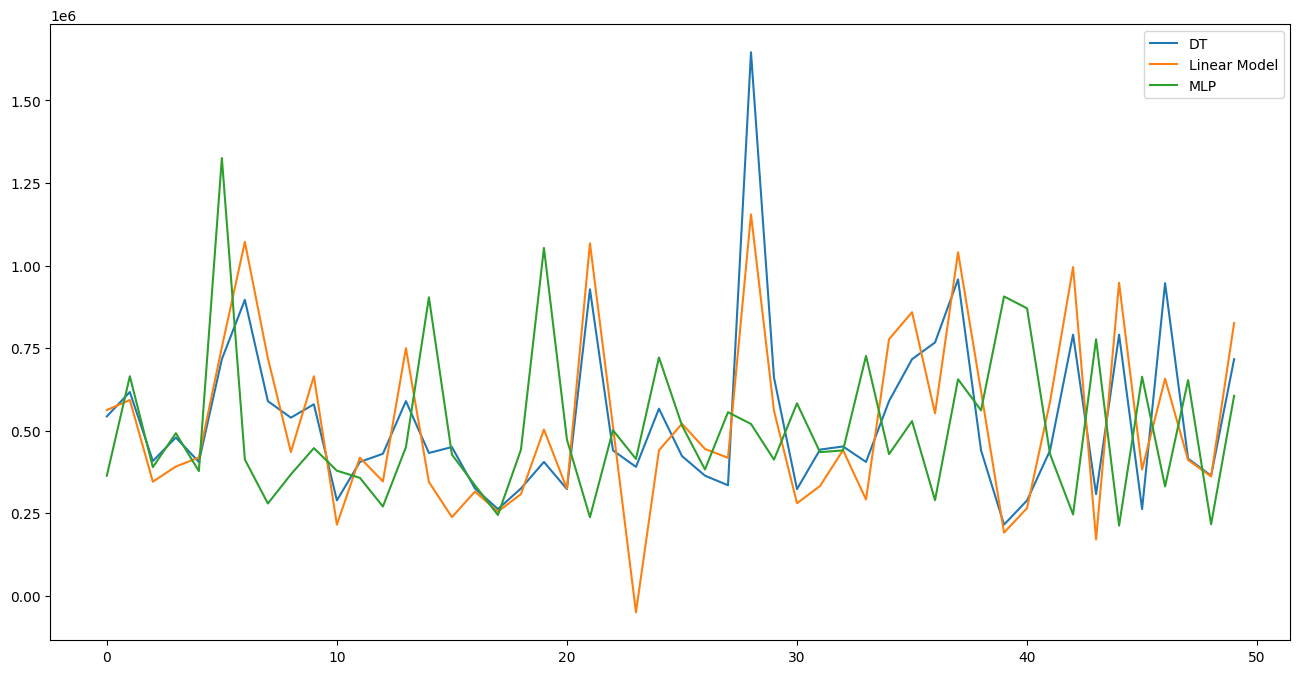

In [48]:
# criando um dataframe com y_test e dt_predicao
model_outcomes = pd.DataFrame({'DT':dt_predicao, 'Linear Model':regr_predicao, 'MLP': df['new_price'][:10806]})
fig= plt.figure(figsize=(16,8))
model_outcomes = model_outcomes.reset_index()
model_outcomes = model_outcomes.drop(['index'],axis=1)
plt.plot(model_outcomes[:50])
plt.legend(['DT','Linear Model','MLP'])

In [49]:
from sklearn import metrics # quanto maior pior é o modelo

print('|Modelo\t|\tMAE\t|\tMSE\t|\tRMSE\t|')
print(' Tree:', f'       {int(metrics.mean_absolute_error(Y_test, dt_predicao))}', f'       {int(metrics.mean_squared_error(Y_test, dt_predicao))}', f'      {int(np.sqrt(metrics.mean_squared_error(Y_test, dt_predicao)))}')

print(' Linear:', f'     {int(metrics.mean_absolute_error(Y_test, regr_predicao))}', f'       {int(metrics.mean_squared_error(Y_test, regr_predicao))}', f'      {int(np.sqrt(metrics.mean_squared_error(Y_test, regr_predicao)))}')

print(' MLP:', f'\t      {int(metrics.mean_absolute_error(y, df["new_price"]))}', f'\t   {int(metrics.mean_squared_error(y, df["new_price"]))}', f'      {int(np.sqrt(metrics.mean_squared_error(y,df["new_price"])))}')


|Modelo	|	MAE	|	MSE	|	RMSE	|
 Tree:        142293        62089350470       249177
 Linear:      140848        50802464832       225394
 MLP: 	      303156 	   222653616233       471861
